In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


loading dataset

In [4]:

df = pd.read_csv("D:\\machine learning practice\\house price regression\\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


checking Null Values

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

handling missing values


In [7]:
# Fill missing values in 'total_bedrooms' with 0
df['total_bedrooms'].fillna(0, inplace=True)
# One-hot encode the 'ocean_proximity' column
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
# Verify the missing values have been handled
print(df.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [10]:
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


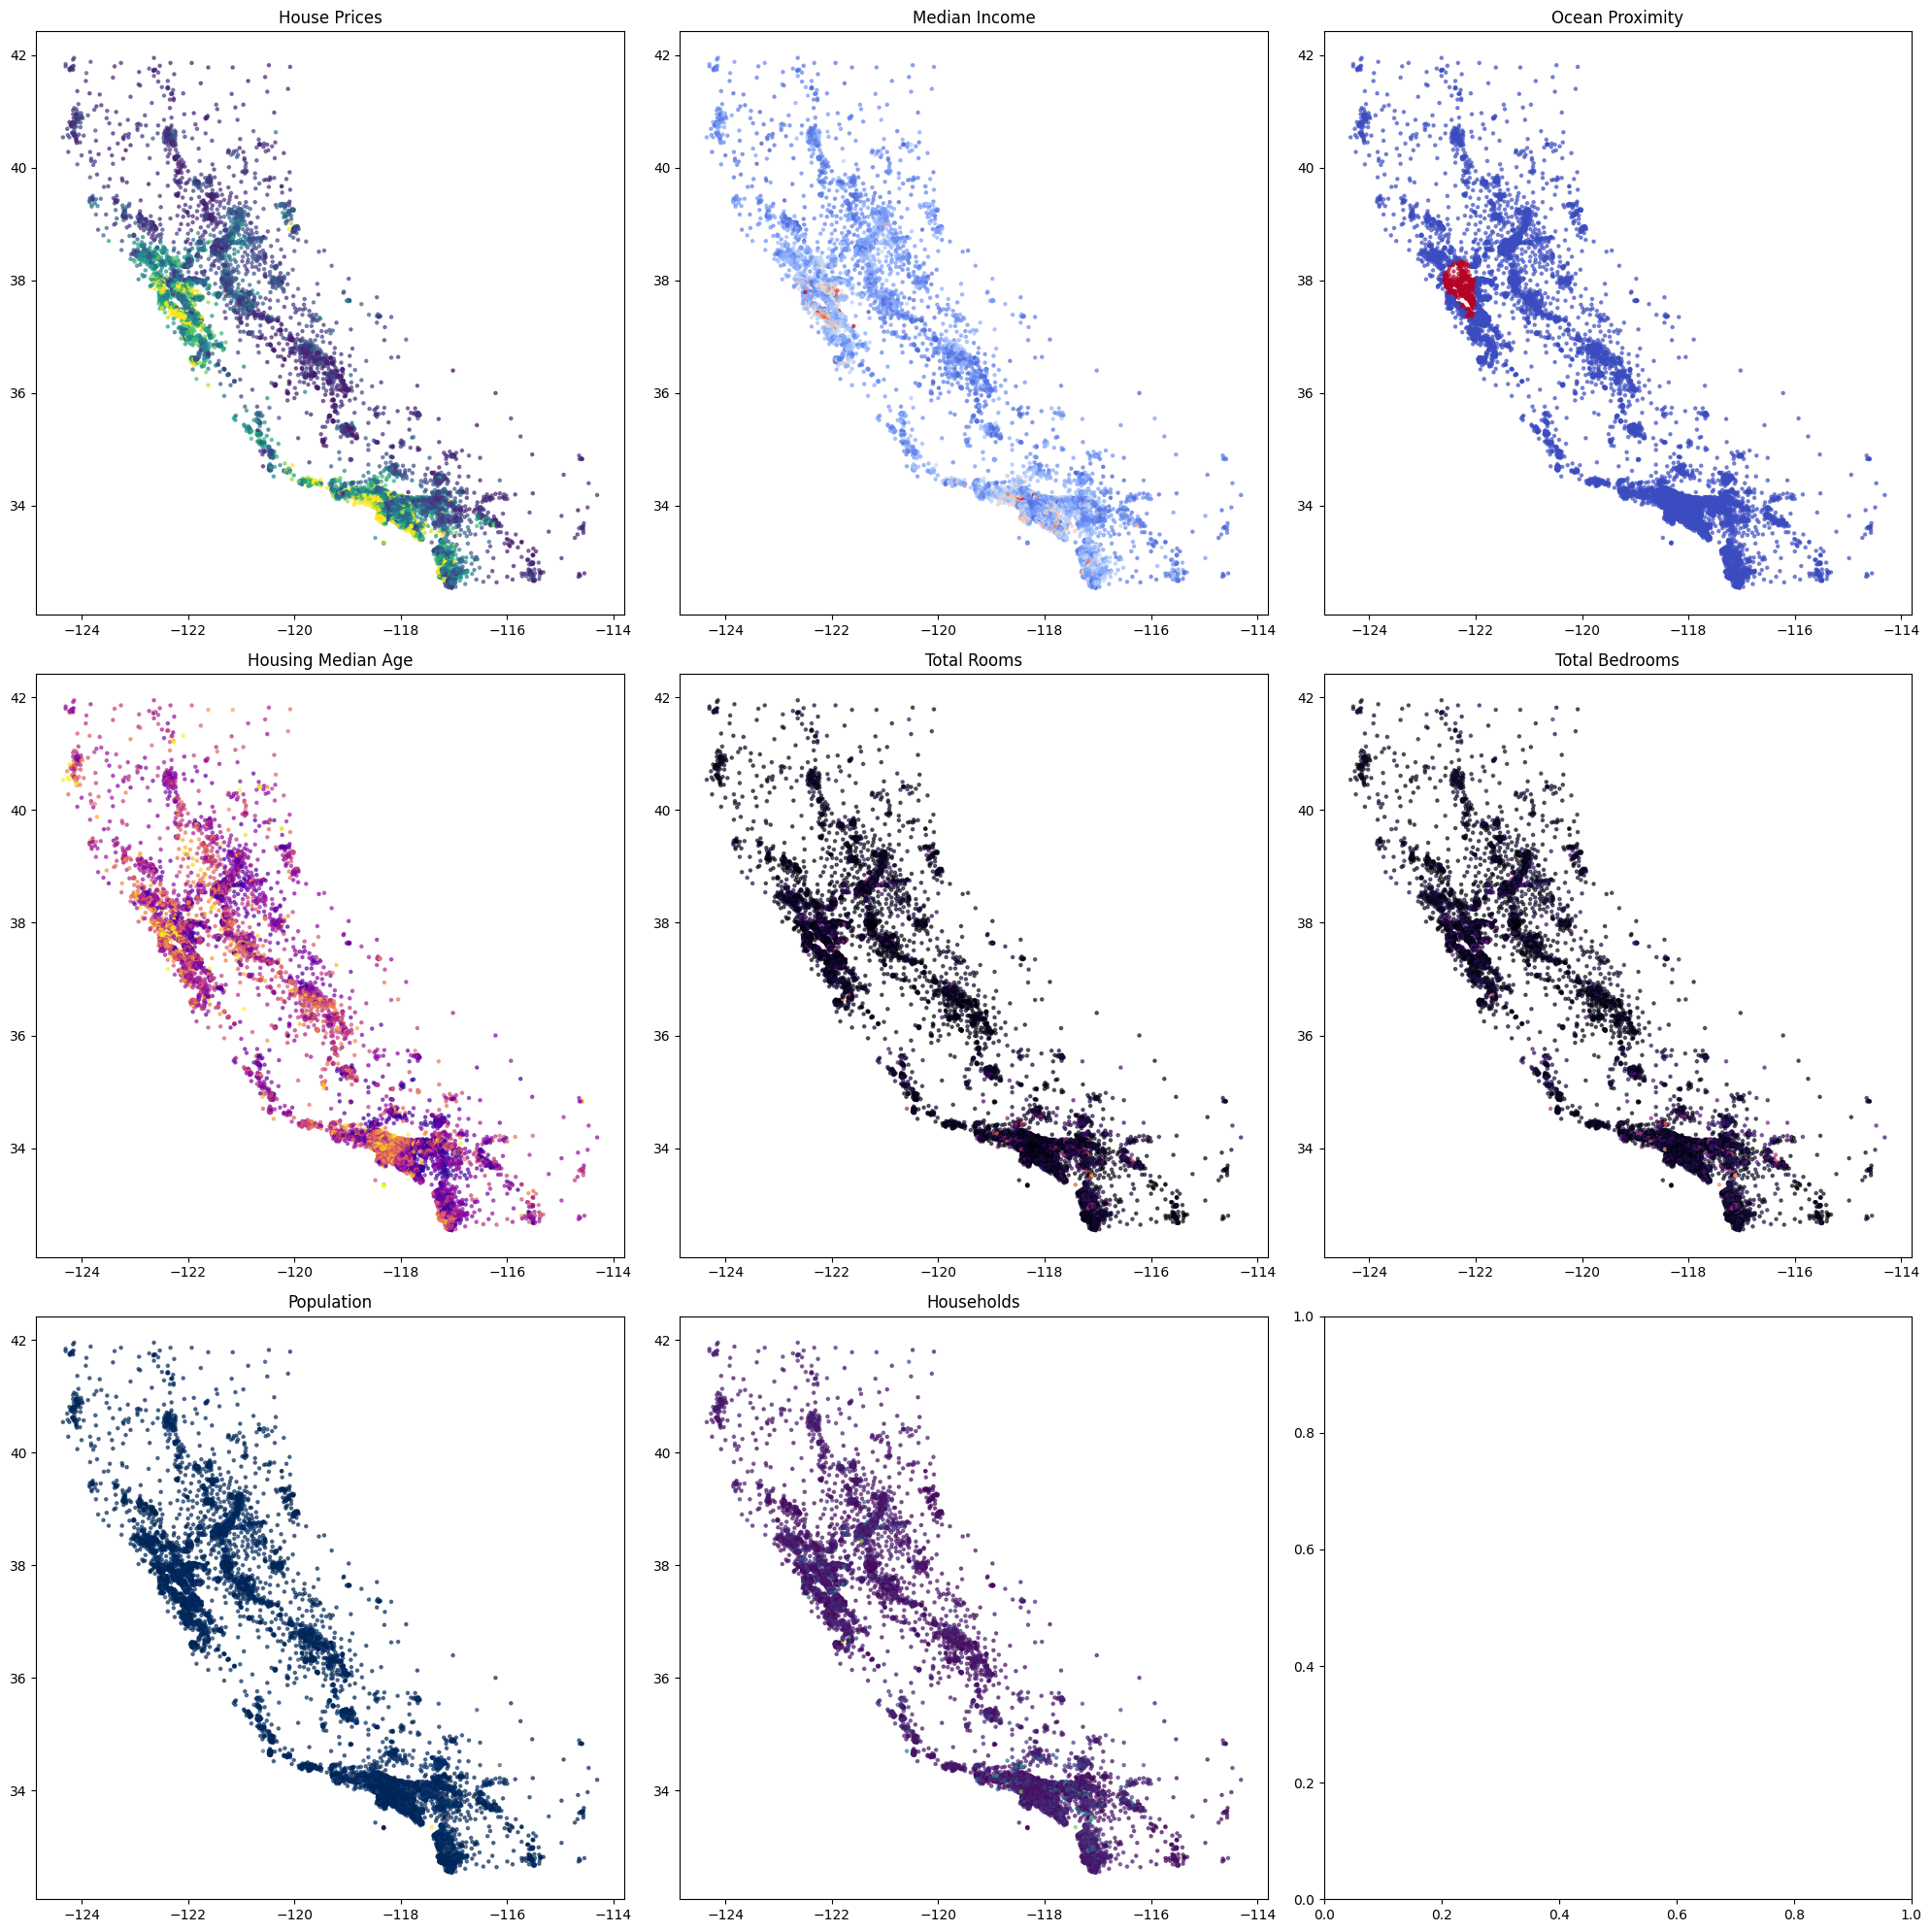

In [13]:
import matplotlib.pyplot as plt

# Create subplots for various features
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Scatter plot of house prices
axes[0, 0].scatter(df.longitude, df.latitude, c=df['median_house_value'], cmap='viridis', s=5, alpha=0.6)
axes[0, 0].set_title('House Prices')

# Scatter plot of median income
axes[0, 1].scatter(df.longitude, df.latitude, c=df['median_income'], cmap='coolwarm', s=5, alpha=0.6)
axes[0, 1].set_title('Median Income')

# Scatter plot by ocean proximity
axes[0, 2].scatter(df.longitude, df.latitude, c=df['ocean_proximity_NEAR BAY'], cmap='coolwarm', s=5, alpha=0.6)
axes[0, 2].set_title('Ocean Proximity')

# Scatter plot of housing median age
axes[1, 0].scatter(df.longitude, df.latitude, c=df['housing_median_age'], cmap='plasma', s=5, alpha=0.6)
axes[1, 0].set_title('Housing Median Age')

# Scatter plot of total rooms
axes[1, 1].scatter(df.longitude, df.latitude, c=df['total_rooms'], cmap='inferno', s=5, alpha=0.6)
axes[1, 1].set_title('Total Rooms')

# Scatter plot of total bedrooms
axes[1, 2].scatter(df.longitude, df.latitude, c=df['total_bedrooms'], cmap='magma', s=5, alpha=0.6)
axes[1, 2].set_title('Total Bedrooms')

# Scatter plot of population
axes[2, 0].scatter(df.longitude, df.latitude, c=df['population'], cmap='cividis', s=5, alpha=0.6)
axes[2, 0].set_title('Population')

# Scatter plot of households
axes[2, 1].scatter(df.longitude, df.latitude, c=df['households'], cmap='viridis', s=5, alpha=0.6)
axes[2, 1].set_title('Households')

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


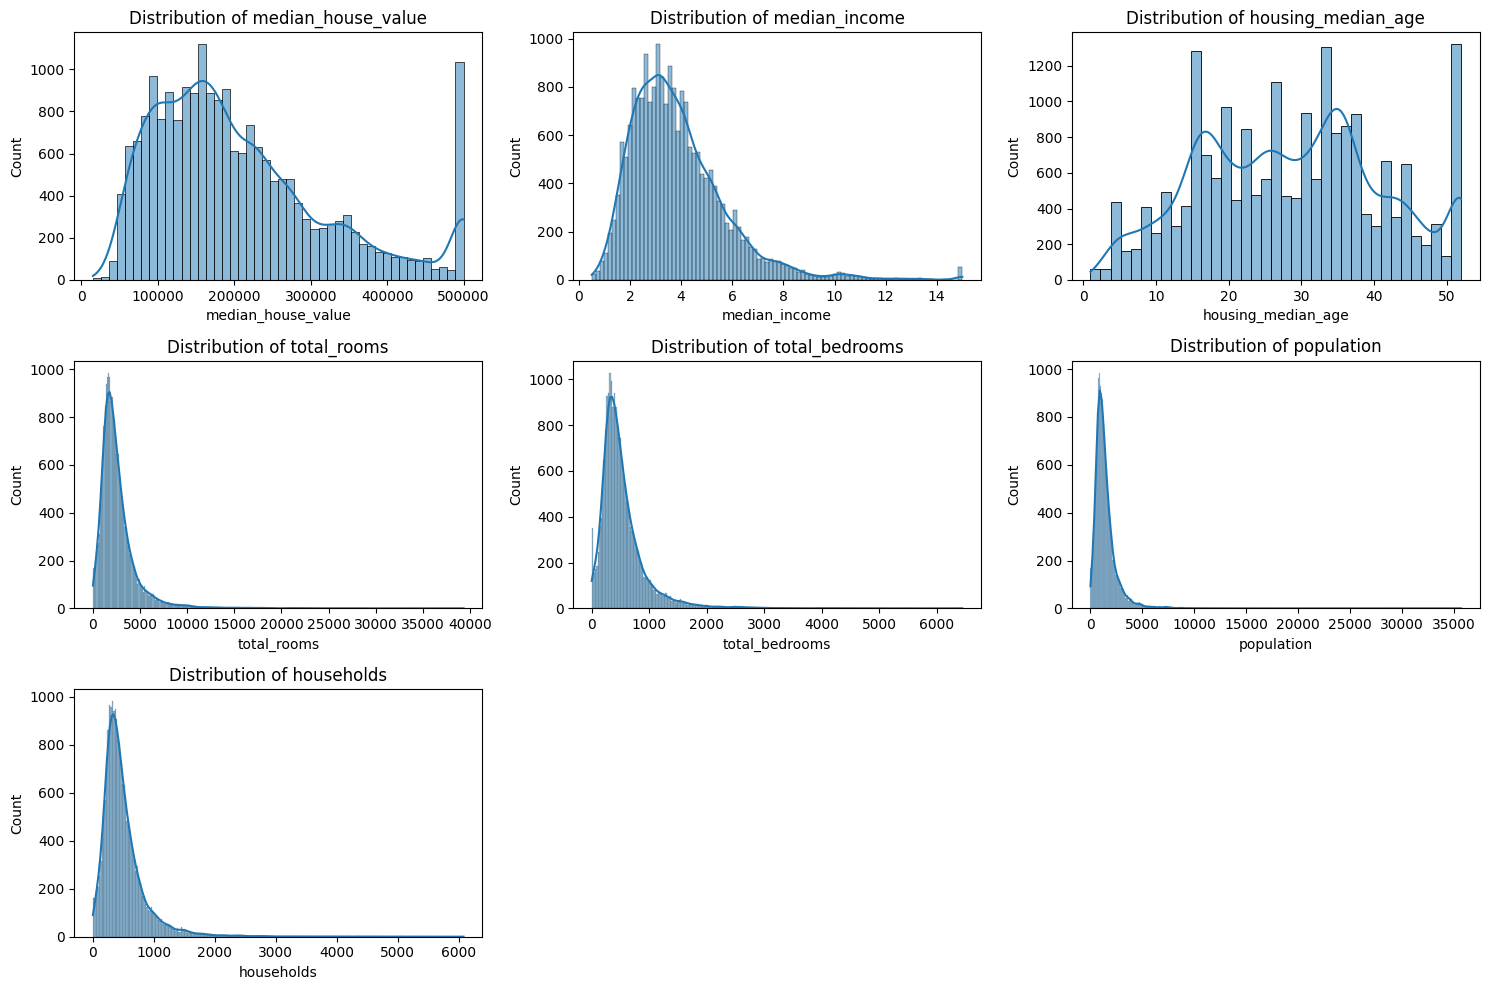

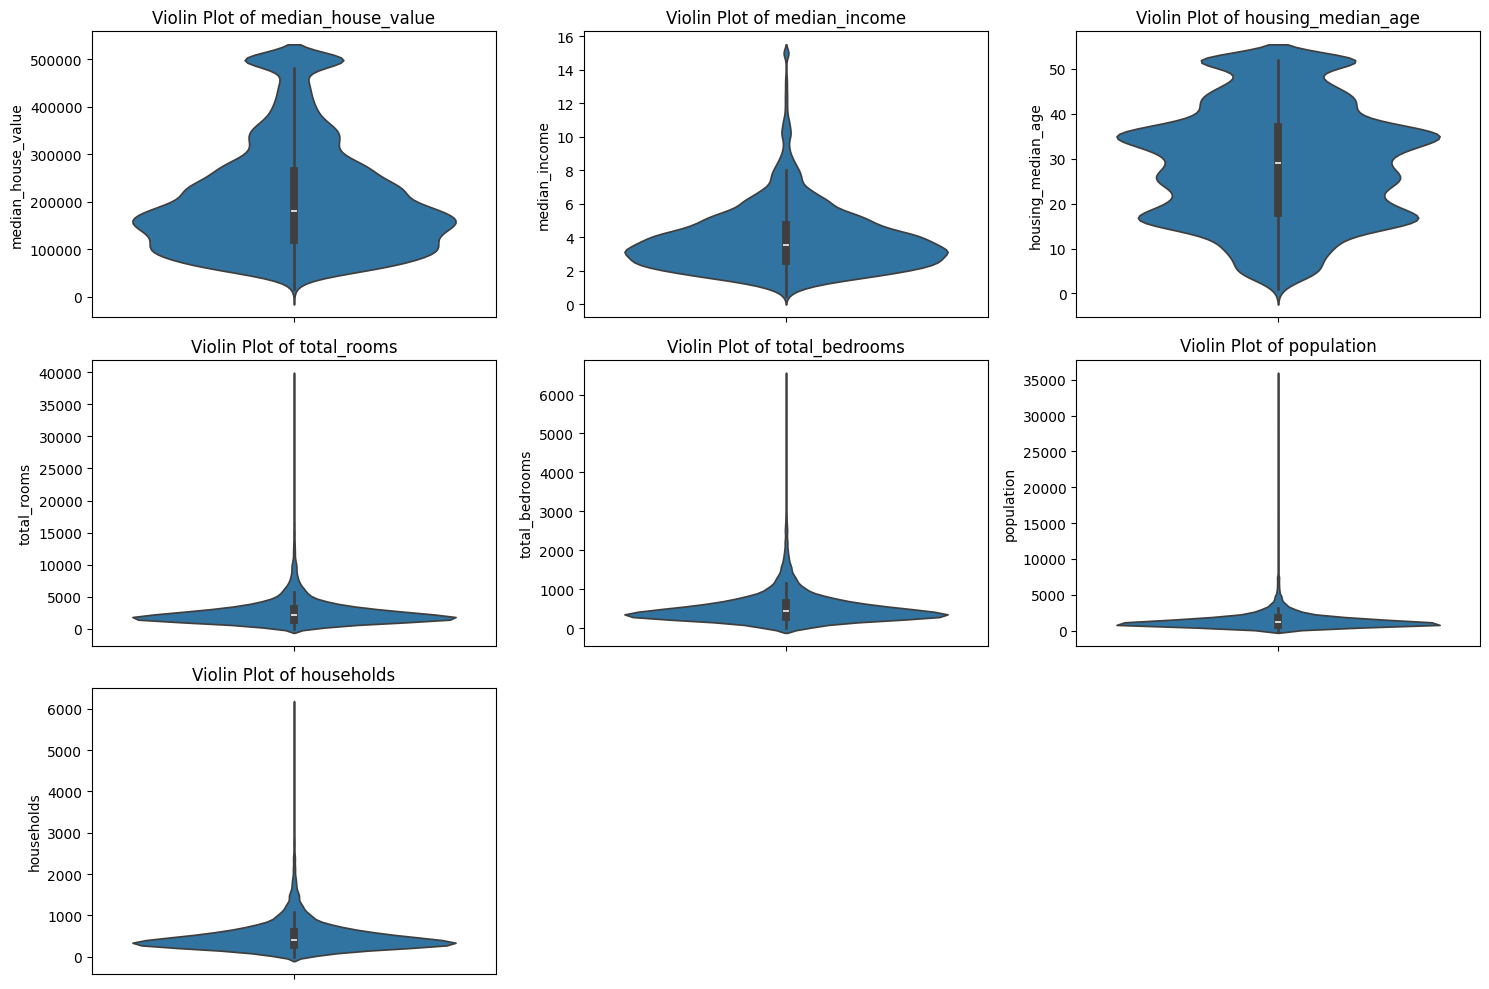

In [15]:
# Distribution Plots
numerical_features = ['median_house_value', 'median_income', 'housing_median_age', 
                      'total_rooms', 'total_bedrooms', 'population', 'households']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Violin Plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(y=df[feature])
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


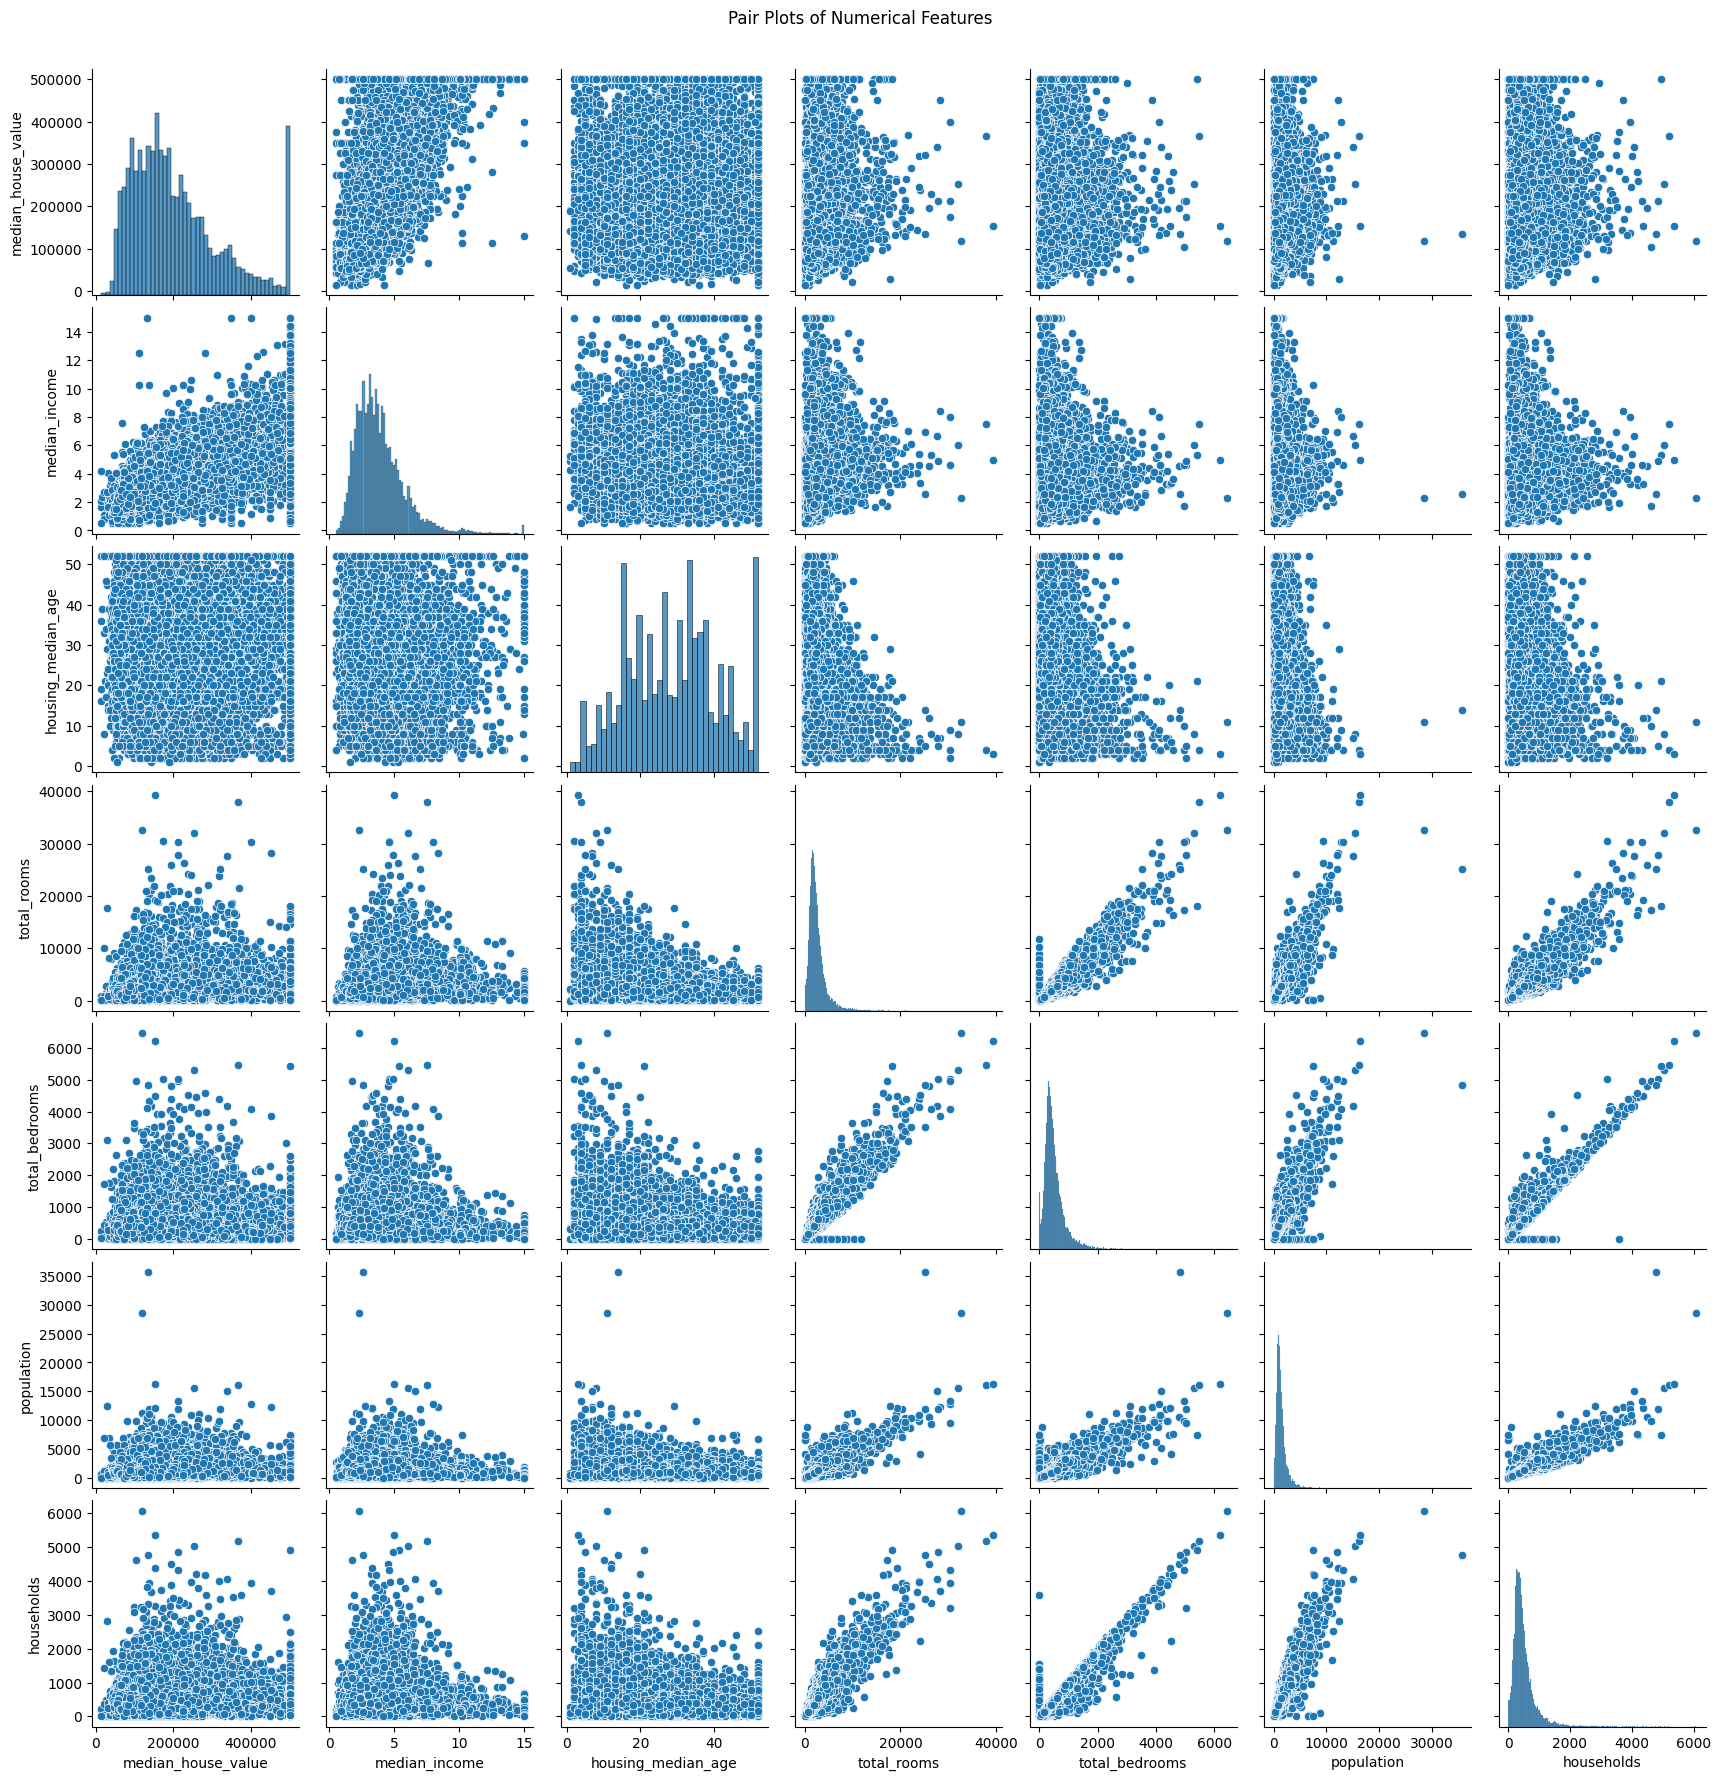

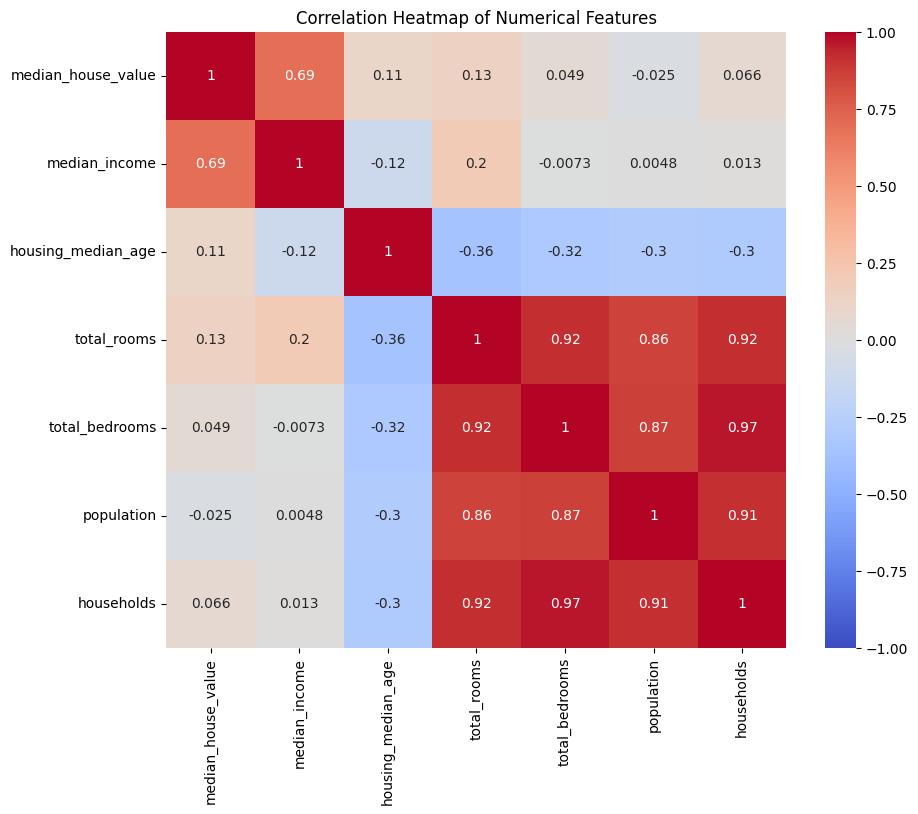

In [16]:
# Pair Plots
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plots of Numerical Features', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

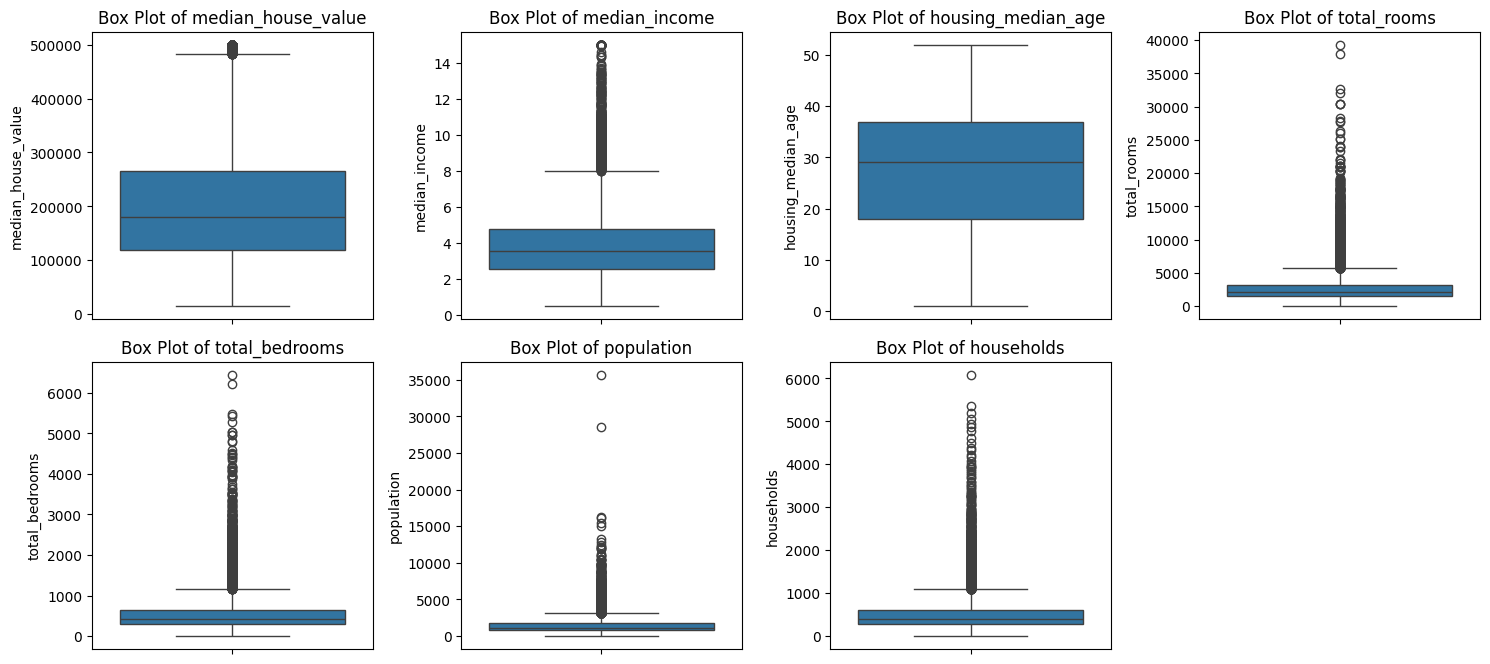

In [17]:
# Box Plots to Identify Outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [18]:
# Function to remove outliers beyond 1.5 * IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from all numerical features
for feature in numerical_features:
    df = remove_outliers(df, feature)

# Verify the changes
print(df.shape)

(16923, 13)


In [20]:
# Function to cap outliers to a certain percentile
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_cap = df[column].quantile(lower_percentile)
    upper_cap = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
    return df

# Cap outliers for all numerical features
for feature in numerical_features:
    df = cap_outliers(df, feature)

# Verify the changes
print(df.shape)


(16923, 13)


In [21]:
# Feature Engineering: Create new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Verify the new features
df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head()

,rooms_per_household,bedrooms_per_room,population_per_household
2,8.288136,0.129516,2.802260
3,5.817352,0.184458,2.547945
4,6.281853,0.172096,2.181467
5,4.761658,0.231774,2.139896
6,4.931907,0.192899,2.128405


In [22]:
# Select numerical features to be normalized
numerical_features = ['median_house_value', 'median_income', 'housing_median_age', 
                      'total_rooms', 'total_bedrooms', 'population', 'households', 
                      'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

# Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = scaler.fit_transform(df[numerical_features])

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the normalization
df_normalized[numerical_features].head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,rooms_per_household,bedrooms_per_room,population_per_household
2,0.767277,1.000000,1.0,0.277705,0.202032,0.164685,0.176116,0.110113,0.165449,0.037556
3,0.739916,0.747431,1.0,0.236966,0.250491,0.189588,0.226779,0.070738,0.235901,0.032342
4,0.742196,0.455213,1.0,0.311478,0.298951,0.192400,0.275030,0.078141,0.220049,0.024828
5,0.558522,0.486209,1.0,0.162030,0.226800,0.131346,0.195416,0.053915,0.296573,0.023975
6,0.633258,0.424786,1.0,0.503143,0.524019,0.404883,0.582630,0.056628,0.246725,0.023740


In [23]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df_normalized.drop(columns='median_house_value')
y = df_normalized['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df_normalized.drop(columns='median_house_value')
y = df_normalized['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MAE: 0.10882777311422209, MSE: 0.021097177230192474, R2: 0.609800175796807


In [25]:
# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - MAE: {mae_dt}, MSE: {mse_dt}, R²: {r2_dt}")


Decision Tree Regressor - MAE: 0.10518102508245218, MSE: 0.024815953224966207, R²: 0.5410200862341559


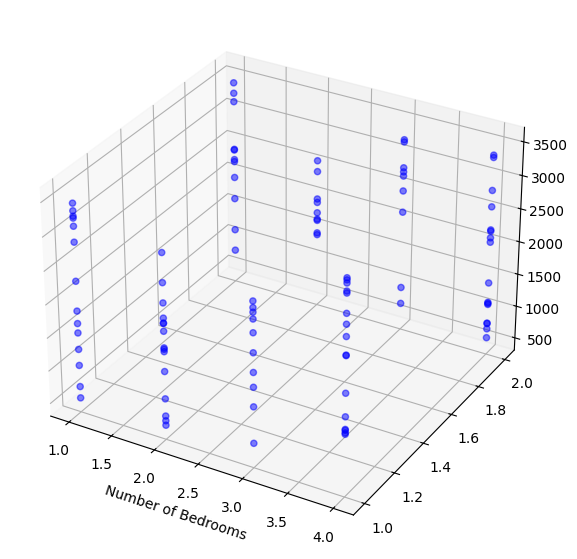

In [31]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Data
# df = pd.read_csv('path_to_your_data.csv') # Uncomment and set your data path
# For demonstration, let's create a sample DataFrame
np.random.seed(0)
df = pd.DataFrame({
    'bedrooms': np.random.randint(1, 5, 100),
    'bathrooms': np.random.randint(1, 3, 100),
    'square_feet': np.random.randint(500, 3500, 100),
    'price': np.random.randint(50000, 500000, 100)
})

# Prepare Data
X = df[['bedrooms', 'bathrooms', 'square_feet']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the actual prices vs. predicted prices
ax.scatter(df['bedrooms'], df['bathrooms'], df['square_feet'], c='blue', marker='o', alpha=0.5)
ax.set_xlabel('Number of Bedrooms')

# Ensure that the feature names passed during fit time match the feature names used during prediction
X_test = X_test[['bedrooms', 'bathrooms', 'square_feet']]
fittedY = model.predict(X_test)
